In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder,StandardScaler,OneHotEncoder


from sklearn.linear_model import LinearRegression, Ridge,ElasticNet,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor


In [3]:
pd.set_option('display.max_columns', None)

In [4]:
train=pd.read_csv('/Users/1c/Downloads/house-prices-advanced-regression-techniques/train.csv')
test=pd.read_csv('/Users/1c/Downloads/house-prices-advanced-regression-techniques/test.csv')

In [5]:
train_df=train.copy()
test_df=test.copy()

In [6]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
print(train_df.shape)
print(test_df.shape)

(1460, 81)
(1459, 80)


In [8]:
#清除缺失值
train_df.isna().sum().sort_values(ascending=False).head(19)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64

In [9]:
#drop PoolQC MiscFeature Alley Fence
train_df.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1,inplace=True)
test_df.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1,inplace=True)

In [10]:
#MasVnrType 缺失值代表沒有：用none取代
train_df['MasVnrType'].fillna('none',inplace=True)
test_df['MasVnrType'].fillna('none',inplace=True)

In [11]:
#FireplaceQu 缺失值代表沒有：用none取代
train_df['FireplaceQu'].fillna('none',inplace=True)
test_df['FireplaceQu'].fillna('none',inplace=True)

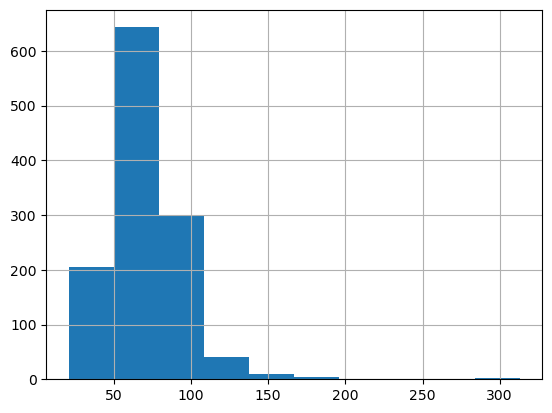

In [12]:
#LotFrontage 
train_df['LotFrontage'].hist()
train_df['LotFrontage'].fillna(train_df['LotFrontage'].median(),inplace=True)#資料偏態，用中位數取代缺失值

In [13]:
#因GarageYrBlt等於yearbuilt，兩者高度相關，選擇留一個就好
train_df.drop('GarageYrBlt',axis=1,inplace=True)
test_df.drop('GarageYrBlt',axis=1,inplace=True)

In [14]:
#GarageCond GarageQual GarageType GarageFinish 缺失值代表沒有：用none取代
train_df['GarageCond'].fillna('none',inplace=True)
test_df['GarageCond'].fillna('none',inplace=True)
train_df['GarageQual'].fillna('none',inplace=True)
test_df['GarageQual'].fillna('none',inplace=True)
train_df['GarageType'].fillna('none',inplace=True)
test_df['GarageType'].fillna('none',inplace=True)
train_df['GarageFinish'].fillna('none',inplace=True)
test_df['GarageFinish'].fillna('none',inplace=True)

In [15]:
train_df['BsmtFinType2'].value_counts()
#BsmtFinType2 太多unfinish，故刪除變數
train_df.drop('BsmtFinType2',axis=1,inplace=True)
test_df.drop('BsmtFinType2',axis=1,inplace=True)

In [16]:
#BsmtExposure 缺失值代表沒有：用none取代
train_df['BsmtExposure'].fillna('none',inplace=True)
test_df['BsmtExposure'].fillna('none',inplace=True)

In [17]:
#BsmtQual BsmtCond 缺失值代表沒有：用none取代
train_df['BsmtQual'].fillna('none',inplace=True)
test_df['BsmtQual'].fillna('none',inplace=True)
train_df['BsmtCond'].fillna('none',inplace=True)
test_df['BsmtCond'].fillna('none',inplace=True)

In [18]:
#BsmtFinType1 缺失值代表沒有：用none取代
train_df['BsmtFinType1'].fillna('none',inplace=True)
test_df['BsmtFinType1'].fillna('none',inplace=True)

In [19]:
#MasVnrArea
train_df['MasVnrArea'].value_counts()
train_df['MasVnrArea'].fillna(0,inplace=True)

In [20]:
#Electrical
train_df['Electrical'].value_counts()
train_df['Electrical'].fillna('SBrkr',inplace=True)

In [21]:
train_df.isna().sum().sort_values(ascending=False)#缺失值清理完畢

Id              0
GarageType      0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
               ..
MasVnrType      0
Exterior2nd     0
Exterior1st     0
RoofMatl        0
SalePrice       0
Length: 75, dtype: int64

In [22]:
#去除outliers
train_df.select_dtypes(exclude='object').columns#找出int跟float的特徵

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

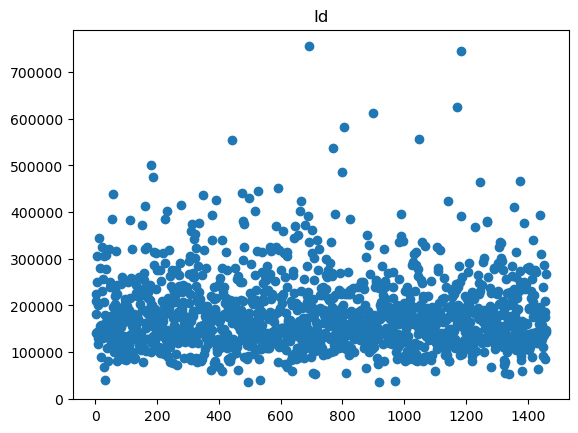

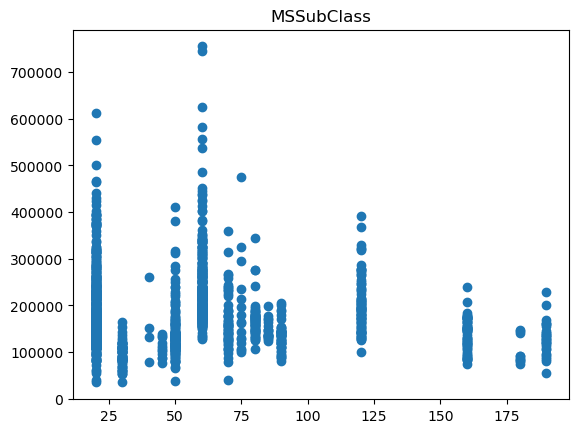

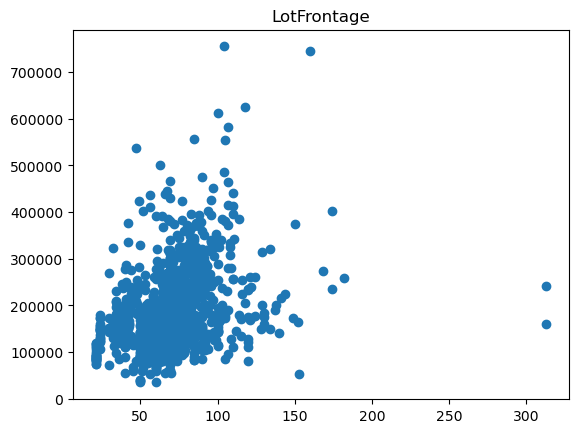

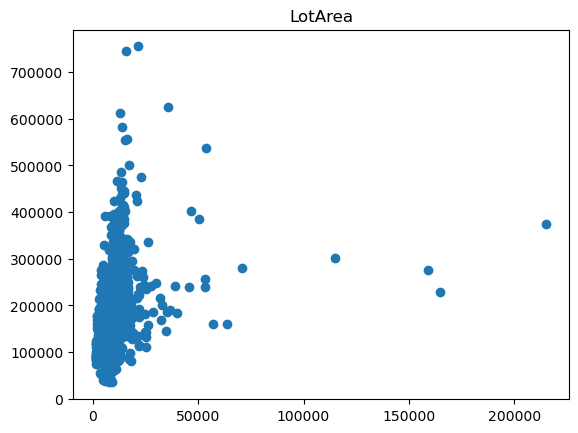

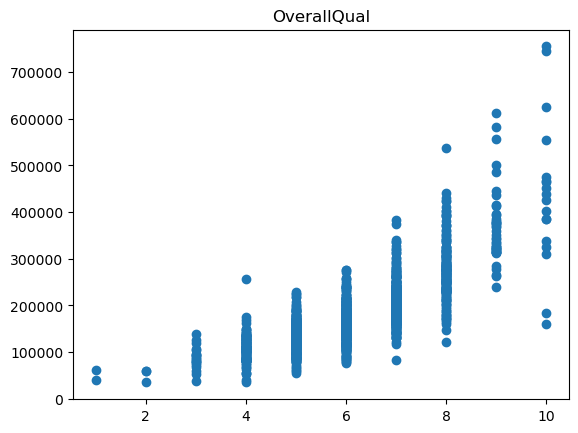

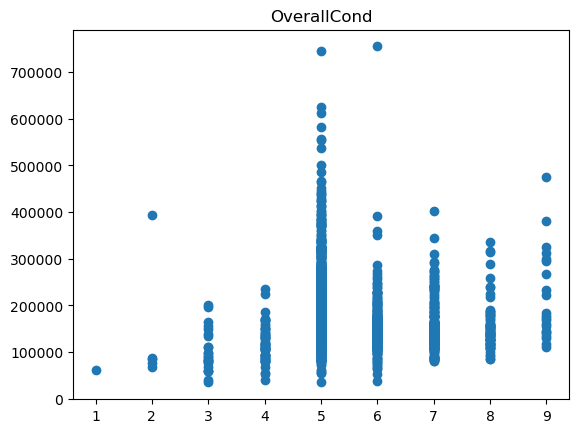

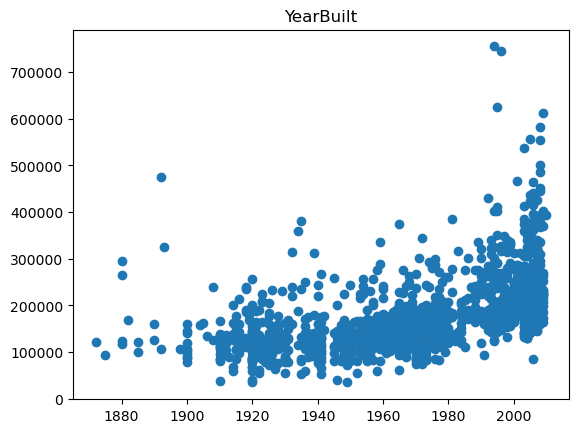

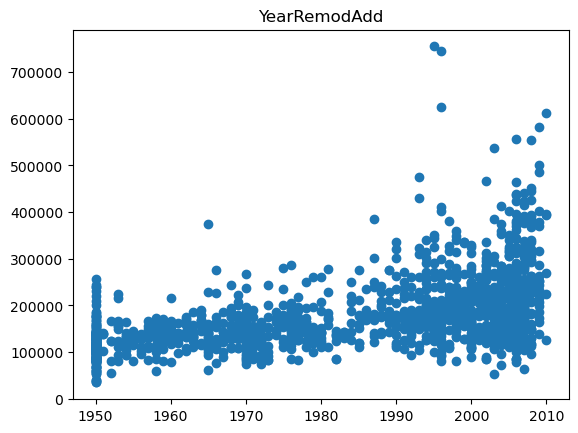

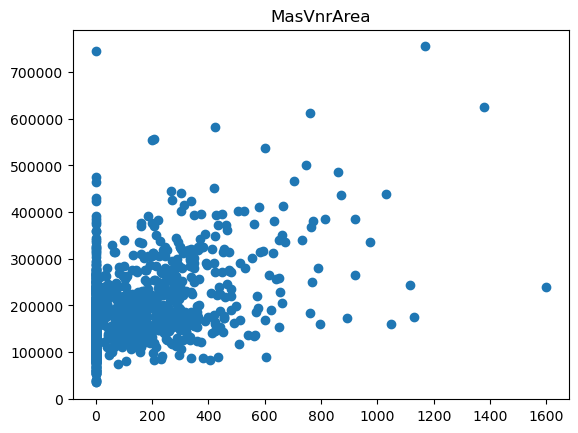

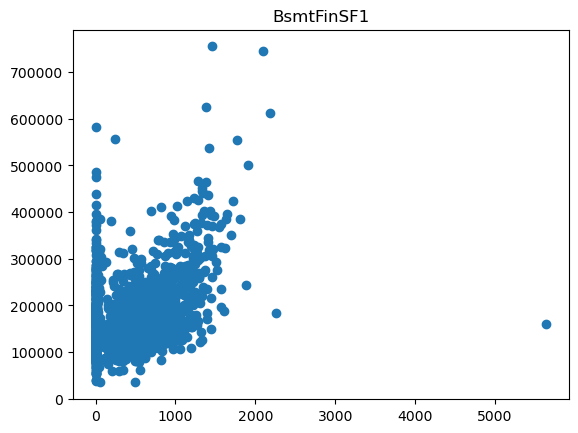

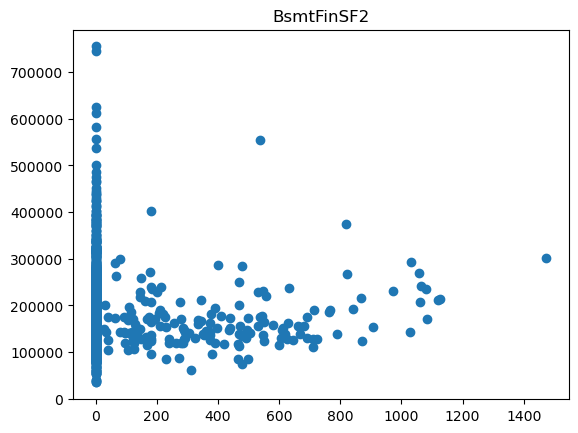

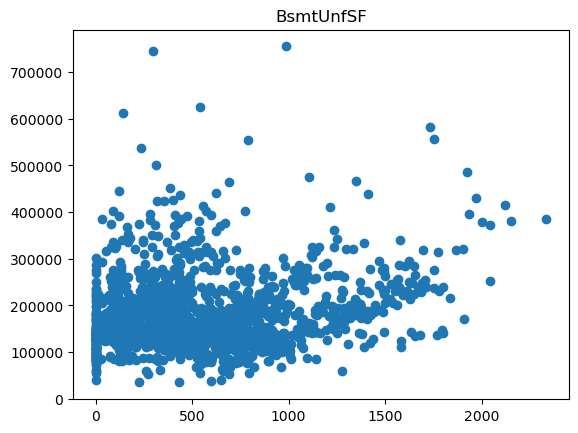

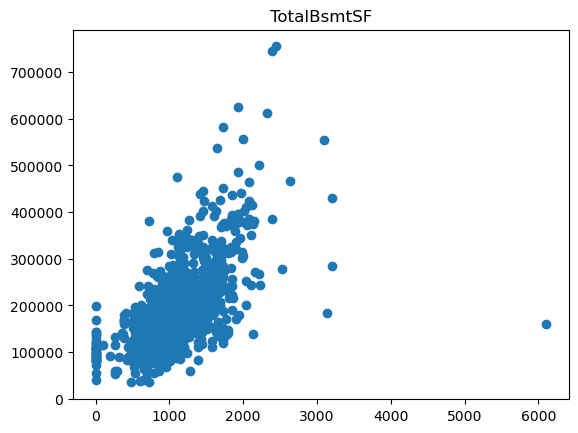

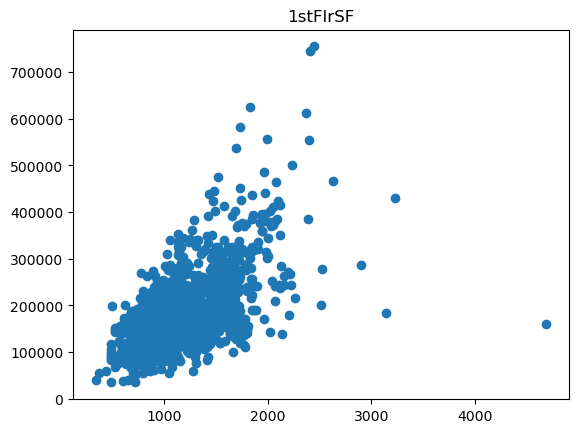

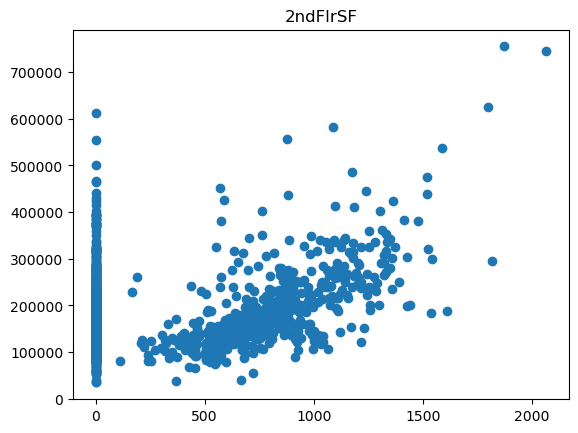

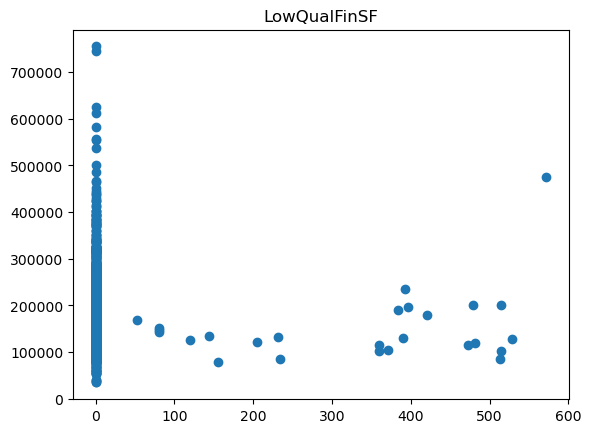

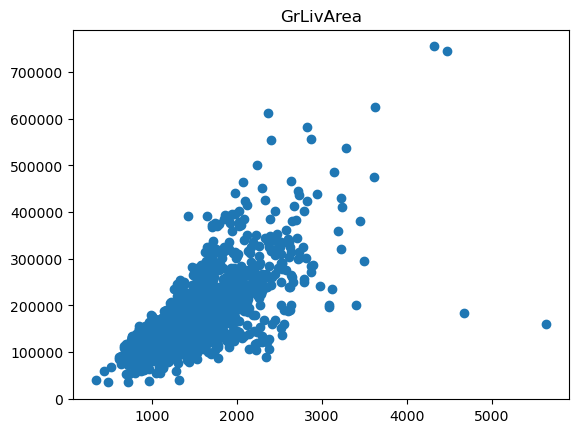

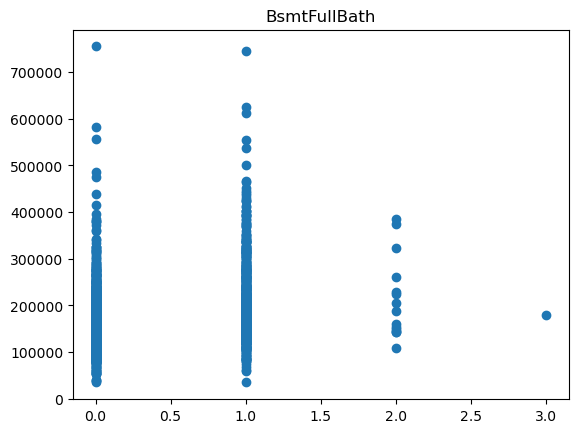

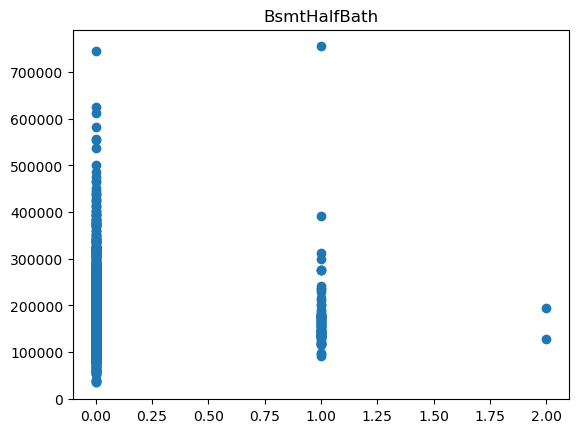

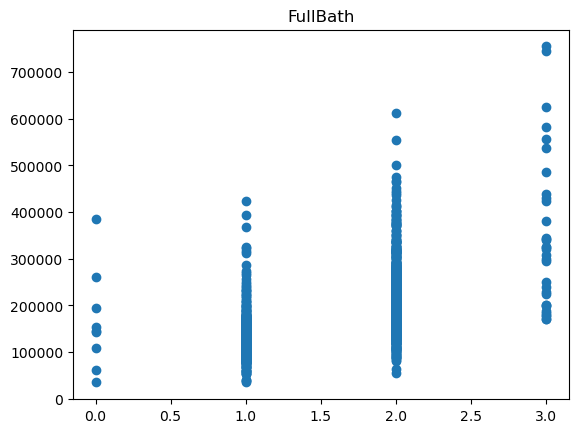

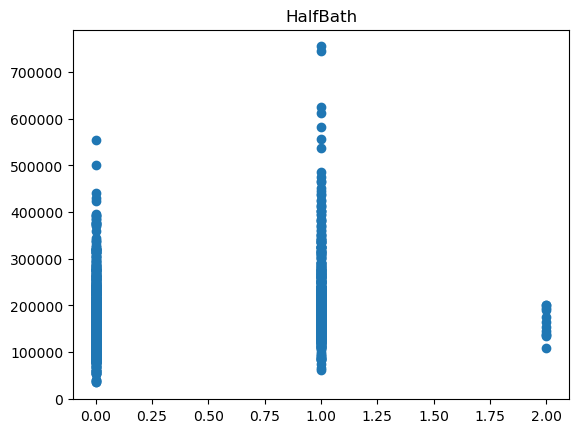

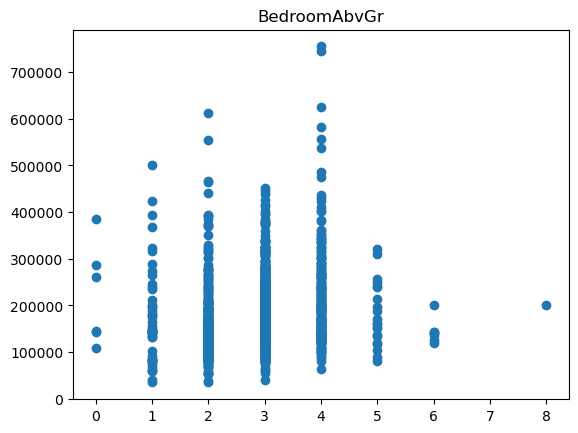

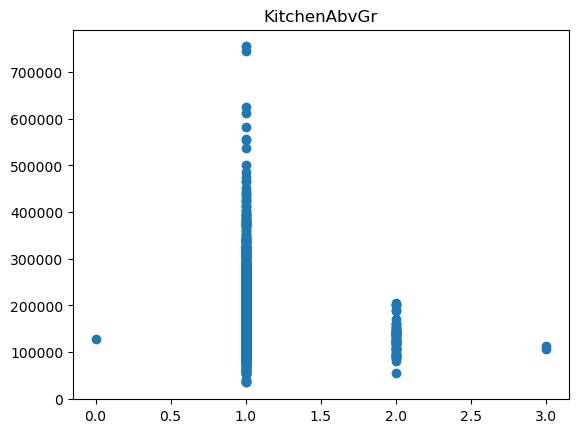

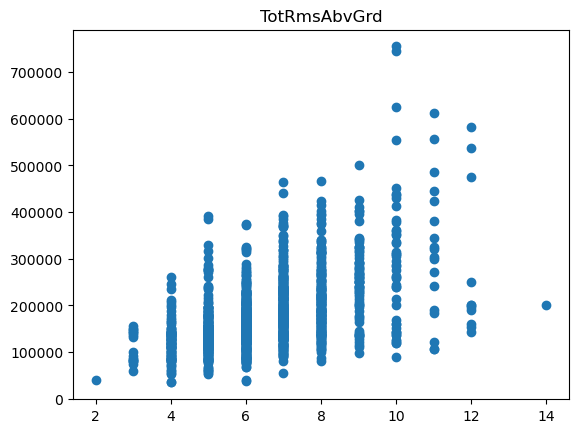

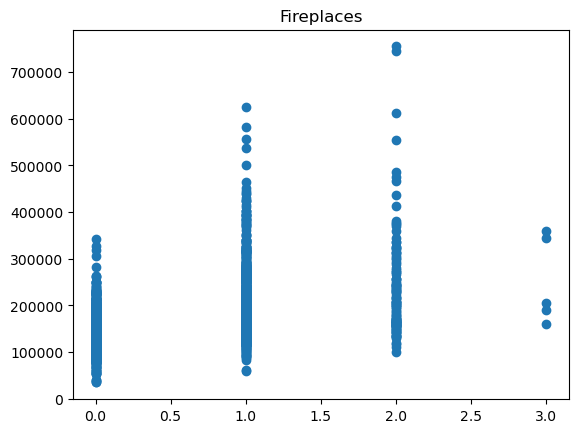

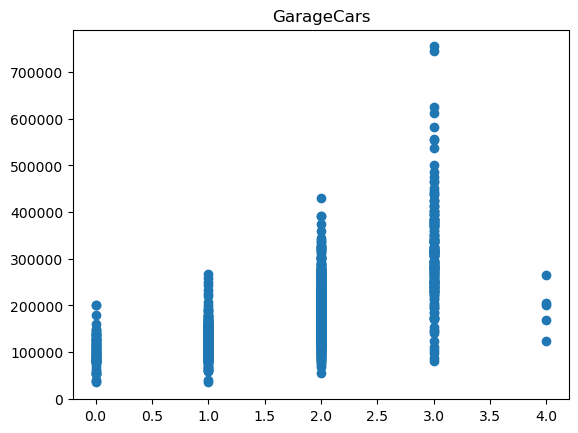

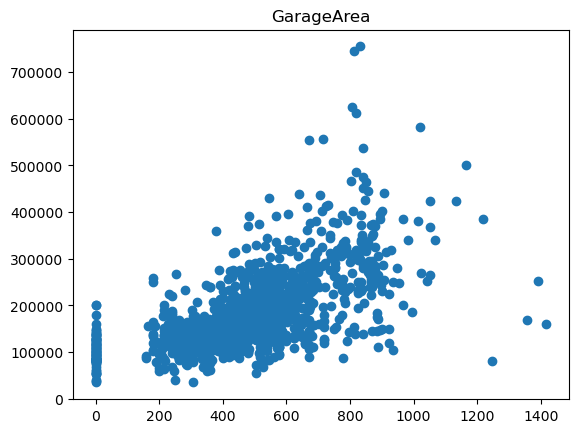

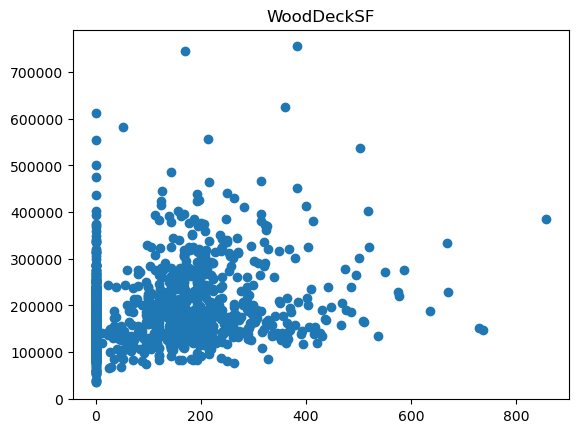

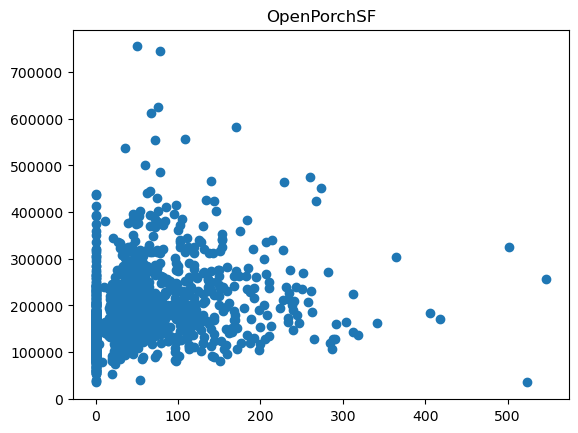

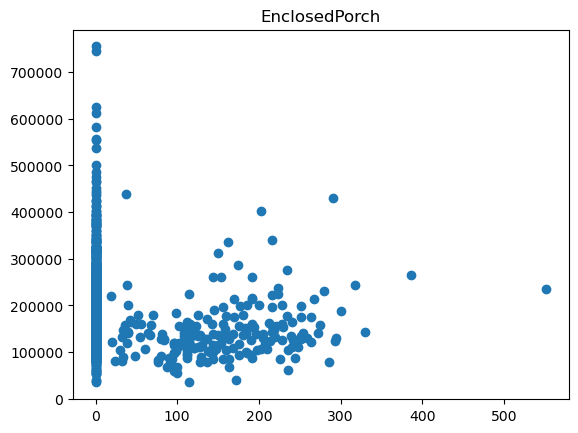

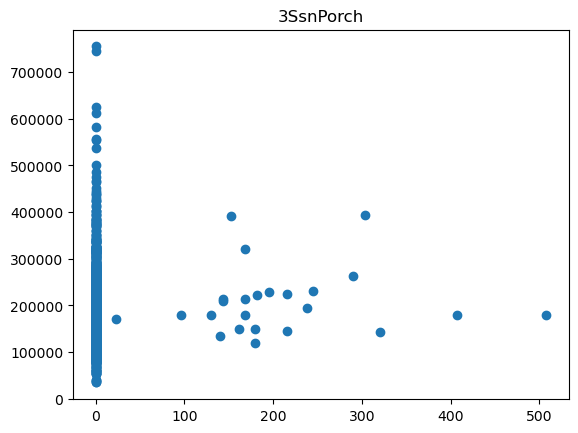

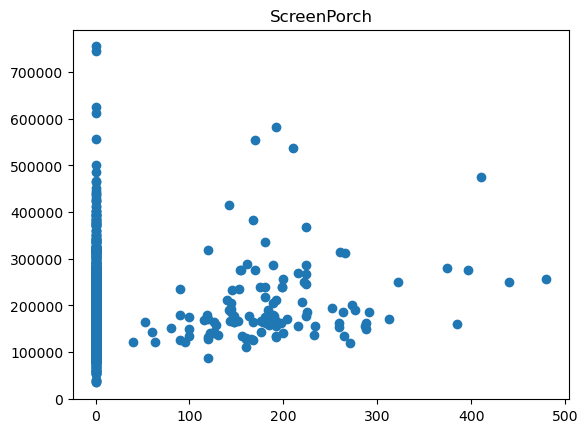

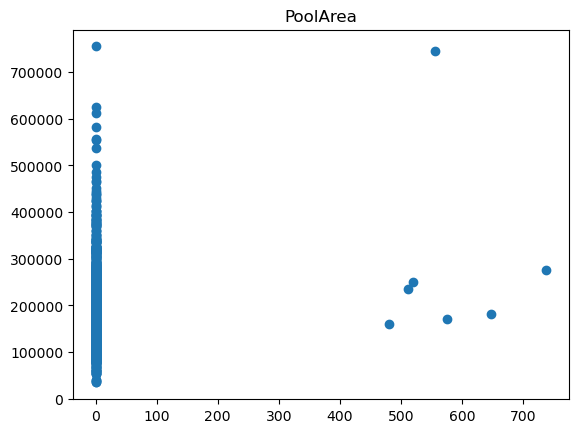

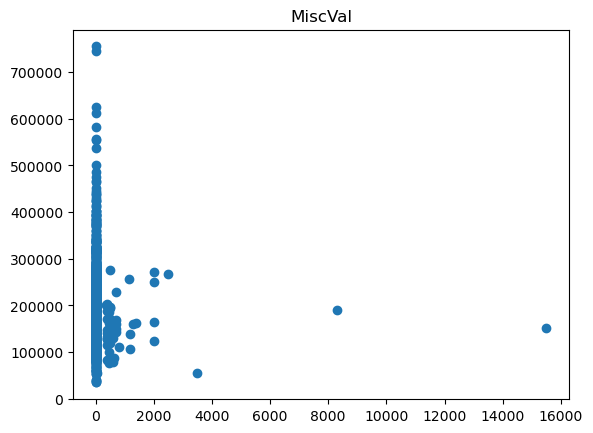

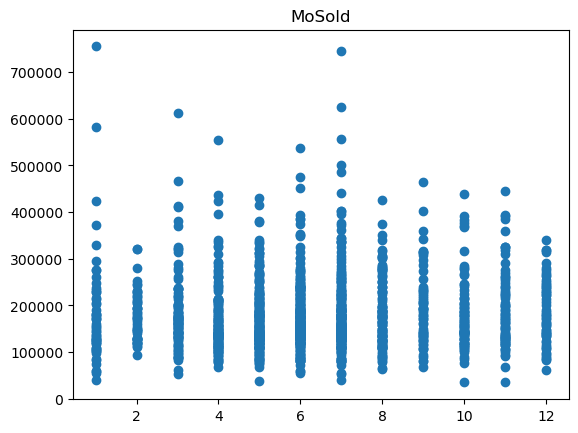

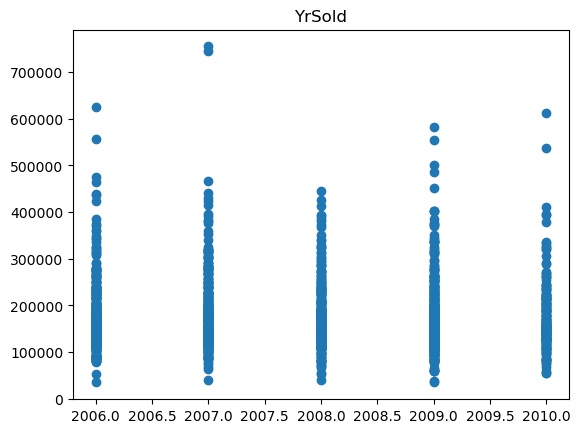

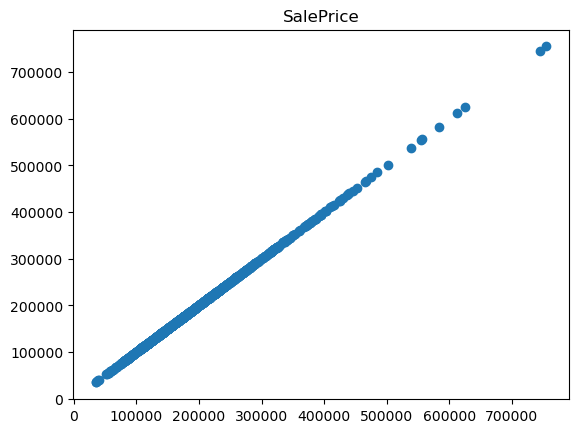

In [23]:
#透過scatter plot 找出異常值
for col in train_df.select_dtypes(exclude='object').columns:
    plt.scatter(x=col,y='SalePrice',data=train_df)
    plt.title(f'{col}')
    plt.show()

In [24]:
drop_index=train_df[(train_df['LotFrontage']>300)
         |(train_df['LotArea']>100000)
         |(train_df['MasVnrArea']>1500)
         |(train_df['BsmtFinSF1']>5000)
         |(train_df['TotalBsmtSF']>5000)
         |(train_df['1stFlrSF']>5000)
         |((train_df['2ndFlrSF']>1600)&(train_df['SalePrice']<320000))
         |((train_df['GrLivArea']>4000)&(train_df['SalePrice']<320000))
         |((train_df['GarageArea']>1200)&(train_df['SalePrice']<300000))].index
train_df.drop(drop_index,axis=0,inplace=True)

In [25]:
#去除變異性過低的變數（int,float）
#drop BsmtFinSF2 LowQualFinSF MiscVal PoolArea MoSold
train_df.drop(['BsmtFinSF2','LowQualFinSF','MiscVal','PoolArea','MoSold'],axis=1,inplace=True)
test_df.drop(['BsmtFinSF2','LowQualFinSF','MiscVal','PoolArea','MoSold'],axis=1,inplace=True)

In [26]:
#觀察object變數
for col in train_df.select_dtypes(include='object').columns:
    print(col)
    print(train_df[col].value_counts(normalize=True).sort_values(ascending=False))
    print(test_df[col].value_counts(normalize=True).sort_values(ascending=False))
    print('--------------')

MSZoning
MSZoning
RL         0.788528
RM         0.149965
FV         0.044229
RH         0.011057
C (all)    0.006220
Name: proportion, dtype: float64
MSZoning
RL         0.765636
RM         0.166323
FV         0.050859
C (all)    0.010309
RH         0.006873
Name: proportion, dtype: float64
--------------
Street
Street
Pave    0.997236
Grvl    0.002764
Name: proportion, dtype: float64
Street
Pave    0.995888
Grvl    0.004112
Name: proportion, dtype: float64
--------------
LotShape
LotShape
Reg    0.635798
IR1    0.332412
IR2    0.026261
IR3    0.005529
Name: proportion, dtype: float64
LotShape
Reg    0.640164
IR1    0.331734
IR2    0.023989
IR3    0.004112
Name: proportion, dtype: float64
--------------
LandContour
LandContour
Lvl    0.903248
Bnk    0.042156
HLS    0.033172
Low    0.021424
Name: proportion, dtype: float64
LandContour
Lvl    0.898561
HLS    0.047978
Bnk    0.037012
Low    0.016450
Name: proportion, dtype: float64
--------------
Utilities
Utilities
AllPub    0.999309
No

In [27]:
#去除過度集中導致變異性過低的變數:超過9成集中在同一個類別上
#drop Street LandContour LandSlope Utilities RoofMatl Heating CentralAir Electrical Functional GarageCond PavedDrive
train_df.drop(['Street','LandContour',
               'LandSlope','Utilities',
              'RoofMatl','Heating',
              'CentralAir','Electrical',
              'Functional','GarageCond','PavedDrive','Condition2'],axis=1,inplace=True)
test_df.drop(['Street','LandContour',
               'LandSlope','Utilities',
              'RoofMatl','Heating',
              'CentralAir','Electrical',
              'Functional','GarageCond','PavedDrive','Condition2'],axis=1,inplace=True)

In [28]:
#feature engineering
#year
train_df['houseage']=train_df['YrSold']-train_df['YearBuilt']
train_df['houseremodel']=train_df['YrSold']-train_df['YearRemodAdd']
train_df['isremodel']=(train_df['YearRemodAdd']!=train_df['YearBuilt']).astype(int)
test_df['houseage']=test_df['YrSold']-test_df['YearBuilt']
test_df['houseremodel']=test_df['YrSold']-test_df['YearRemodAdd']
test_df['isremodel']=(test_df['YearRemodAdd']!=test_df['YearBuilt']).astype(int)
#MSSubClass
train_df['MSSubClass']=train_df['MSSubClass'].astype(str)
test_df['MSSubClass']=test_df['MSSubClass'].astype(str)
#space
train_df['totalsf']=train_df['BsmtFinSF1']+train_df['1stFlrSF']+train_df['2ndFlrSF']
train_df['totalarea']=train_df['TotalBsmtSF']+train_df['GrLivArea']
test_df['totalsf']=test_df['BsmtFinSF1']+test_df['1stFlrSF']+test_df['2ndFlrSF']
test_df['totalarea']=test_df['TotalBsmtSF']+test_df['GrLivArea']
#bath
train_df['totalfullbath']=train_df['BsmtFullBath']+train_df['FullBath']
train_df['totalhalfbath']=train_df['BsmtHalfBath']+train_df['HalfBath']
test_df['totalfullbath']=test_df['BsmtFullBath']+test_df['FullBath']
test_df['totalhalfbath']=test_df['BsmtHalfBath']+test_df['HalfBath']
#porch
train_df['porch']=train_df['OpenPorchSF']+train_df['3SsnPorch']+train_df['EnclosedPorch']+train_df['ScreenPorch']
test_df['porch']=test_df['OpenPorchSF']+test_df['3SsnPorch']+test_df['EnclosedPorch']+test_df['ScreenPorch']

<Axes: >

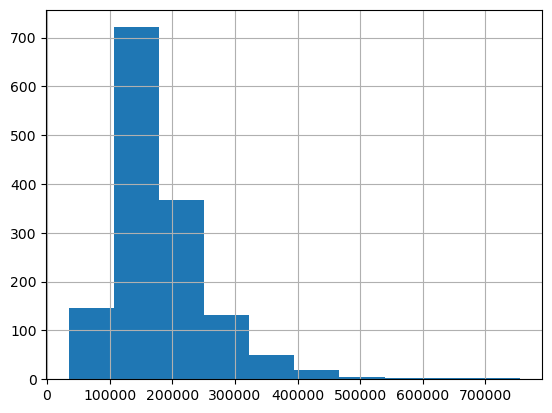

In [29]:
train_df['SalePrice'].hist() #右偏 進行對數轉換

In [30]:
train_df['SalePrice']=np.log(train_df['SalePrice'])

In [31]:
train_df.drop(['YrSold','YearBuilt','YearRemodAdd','BsmtFinSF1',
               '1stFlrSF','2ndFlrSF','TotalBsmtSF','GrLivArea',
               'BsmtFullBath','FullBath','BsmtHalfBath','HalfBath',
               'OpenPorchSF','3SsnPorch','EnclosedPorch','ScreenPorch'],axis=1,inplace=True)
test_df.drop(['YrSold','YearBuilt','YearRemodAdd','BsmtFinSF1',
               '1stFlrSF','2ndFlrSF','TotalBsmtSF','GrLivArea',
               'BsmtFullBath','FullBath','BsmtHalfBath','HalfBath',
               'OpenPorchSF','3SsnPorch','EnclosedPorch','ScreenPorch'],axis=1,inplace=True)

In [32]:
train_df.shape

(1447, 50)

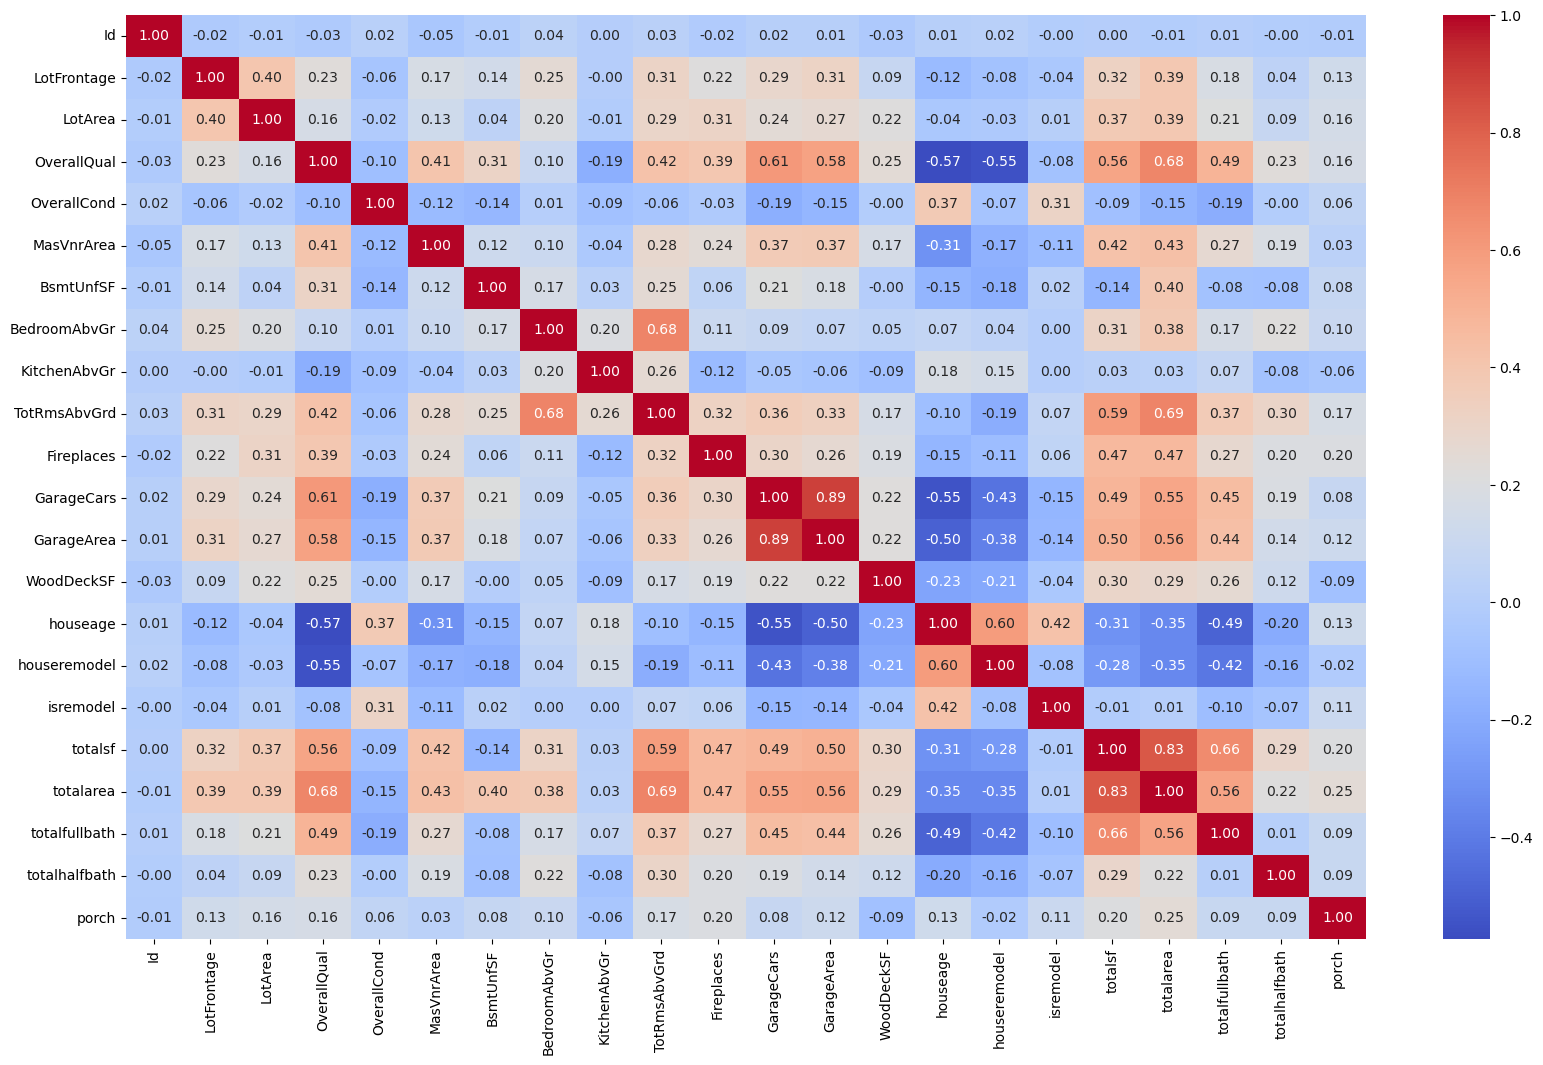

In [33]:
#觀察相關係數
corr_matrix=train_df.drop('SalePrice',axis=1).corr(numeric_only=True)
plt.figure(figsize=(20,12))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.show()
#去除相關係數太高的
train_df.drop(['GarageCars','totalsf'],axis=1,inplace=True)
test_df.drop(['GarageCars','totalsf'],axis=1,inplace=True)

In [34]:
train_df.head()
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1447 entries, 0 to 1459
Data columns (total 48 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1447 non-null   int64  
 1   MSSubClass     1447 non-null   object 
 2   MSZoning       1447 non-null   object 
 3   LotFrontage    1447 non-null   float64
 4   LotArea        1447 non-null   int64  
 5   LotShape       1447 non-null   object 
 6   LotConfig      1447 non-null   object 
 7   Neighborhood   1447 non-null   object 
 8   Condition1     1447 non-null   object 
 9   BldgType       1447 non-null   object 
 10  HouseStyle     1447 non-null   object 
 11  OverallQual    1447 non-null   int64  
 12  OverallCond    1447 non-null   int64  
 13  RoofStyle      1447 non-null   object 
 14  Exterior1st    1447 non-null   object 
 15  Exterior2nd    1447 non-null   object 
 16  MasVnrType     1447 non-null   object 
 17  MasVnrArea     1447 non-null   float64
 18  ExterQual    

In [35]:
#變數轉換

In [36]:
num_col=train_df.select_dtypes(exclude='object').drop(['Id','SalePrice'],axis=1).columns.tolist()
num_col
train_df.select_dtypes(include='object').columns

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC',
       'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageQual', 'SaleType', 'SaleCondition'],
      dtype='object')

In [37]:
ode_col=['LotShape','ExterQual',
         'ExterCond','BsmtQual','BsmtCond','BsmtExposure',
         'BsmtFinType1','HeatingQC','KitchenQual',
         'FireplaceQu','GarageFinish','GarageQual']#ordinal
ohe_col=list(set(train_df.select_dtypes(include='object').columns)-set(ode_col))#one-hot encoding

In [38]:
#ordinal encoding
categories=[
    ['IR3','IR2','IR1','Reg'],
    ['none', 'Po', 'Fa', 'TA', 'Gd','Ex'],
    ['none', 'Po', 'Fa', 'TA', 'Gd','Ex'],
    ['none', 'Po', 'Fa', 'TA', 'Gd','Ex'],
    ['none', 'Po', 'Fa', 'TA', 'Gd','Ex'],
    ['none','No','Mn','Av','Gd'],
    ['none','Unf', 'GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ'],
    ['none', 'Po', 'Fa', 'TA', 'Gd','Ex'],
    ['none', 'Po', 'Fa', 'TA', 'Gd','Ex'],
    ['none', 'Po', 'Fa', 'TA', 'Gd','Ex'],
    ['none','Unf','RFn','Fin'],
    ['none', 'Po', 'Fa', 'TA', 'Gd','Ex'],
]

In [39]:
num_pipeline=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
])
ohe_pipeline=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('ohe',OneHotEncoder(handle_unknown='ignore',sparse_output=False))
])
ode_pipeline=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('ode',OrdinalEncoder(categories=categories,handle_unknown='use_encoded_value',unknown_value=-1))
])

In [40]:
preprocessor=ColumnTransformer(transformers=[
    ('num_p',num_pipeline,num_col),
    ('ohe_p',ohe_pipeline,ohe_col),
    ('ode_p',ode_pipeline,ode_col)
])

In [41]:
pipeline=Pipeline(steps=[
    ('preprocessing',preprocessor)
])

In [42]:
X=train_df.drop(['Id','SalePrice'],axis=1)
y=train_df['SalePrice']

In [43]:
X_pre=pipeline.fit_transform(X)

In [44]:
X_pre.shape

(1447, 172)

In [45]:
X_train,X_test,y_train,y_test=train_test_split(X_pre,y,test_size=0.2,random_state=0)

In [46]:
#models
#linear regression
lreg=LinearRegression()
lreg.fit(X_train,y_train)
y_pred_lreg=lreg.predict(X_test)
mean_squared_error(y_test,y_pred_lreg)

0.011913870295541373

In [47]:
#RandomForest
RFR=RandomForestRegressor(random_state=0)
param_grid_rfr={
    'max_depth':[5,10,15],
    'n_estimators':[100,250,500],
    'min_samples_split':[3,5,10]
}
rfr_cv=GridSearchCV(RFR,param_grid_rfr,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)
rfr_cv.fit(X_train,y_train)
print(np.sqrt(-1*rfr_cv.best_score_))
print(rfr_cv.best_params_)

0.1378898059393355
{'max_depth': 15, 'min_samples_split': 3, 'n_estimators': 500}


In [48]:
#XGB
XGB=XGBRegressor(random_state=0)
param_grid_xgb={
    'learning_rate':[0.01,0.05,0.1],
    'max_depth':[3,5,10],
    'n_estimators':[100,250,500],
    'min_child_weight':[1,2,3],
    'gamma':[0,0.1,0.2],
    'subsample':[0.8,0.9,1.0],
    'colsample_bytree':[0.5,0.8,1.0],
}
xgb_cv=GridSearchCV(XGB,param_grid_xgb,cv=3,scoring='neg_mean_squared_error',n_jobs=-1)
xgb_cv.fit(X_train,y_train)
print(np.sqrt(-1*xgb_cv.best_score_))
print(xgb_cv.best_params_)

0.11801418605205764
{'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 500, 'subsample': 0.8}


In [49]:
#car
cat=CatBoostRegressor(random_seed=0,verbose=0)
param_grid_cat={
    'learning_rate':[0.01,0.05,0.1],
    'iterations':[500,800,1000],
    'depth':[3,5,10],
    'subsample':[0.8,0.9,1.0],
    'loss_function':['RMSE']
}
cat_cv=GridSearchCV(cat,param_grid_cat,cv=3,scoring='neg_mean_squared_error',n_jobs=-1,verbose=0)
cat_cv.fit(X_train,y_train)
print(np.sqrt(-1*cat_cv.best_score_))
print(cat_cv.best_params_)

0.11682884900895531
{'depth': 3, 'iterations': 1000, 'learning_rate': 0.05, 'loss_function': 'RMSE', 'subsample': 1.0}


In [51]:
#stack
est=[
    ('rfr',rfr_cv.best_estimator_),
    ('cat',cat_cv.best_estimator_),
    ('xgb',xgb_cv.best_estimator_)
]
stack=StackingRegressor(estimators=est,final_estimator=Ridge(alpha=1.0),cv=3,verbose=0)
stack.fit(X_train,y_train)
y_pred_stack=stack.predict(X_test)
mean_squared_error(y_test,y_pred_stack)

0.011968373971908952

In [52]:
#test
X_test_pre = pipeline.transform(test_df.drop('Id',axis=1))
y_pred=np.exp(stack.predict(X_test_pre))

In [53]:
submission = pd.DataFrame({
    'Id': test_df['Id'],
    'SalePrice': y_pred
})

submission.to_csv('submission7.csv', index=False)